CNN model for multi-class image classification of fashiom items

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.datasets import fashion_mnist
# alternative syntax: df = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
plt.imshow(x_train_full[6]) # will output a matrix of 28x28 dimensions.
# the grayscale images in the dataset are of 28x28 pixels.
# 0 represents black & 255 represents white. 
# for each record, we have 28x28=784 values. 

In [ ]:
y_train_full[6]

In [6]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [ ]:
class_names[y_train_full[6]]

In [7]:
print(x_train_full.shape,"\n",y_train_full.shape,"\n",x_test.shape,"\n",y_test.shape)

(60000, 28, 28) 
 (60000,) 
 (10000, 28, 28) 
 (10000,)


## Data Reshape

This is the only change that we do during the pre-processing of CNN as compared to ANN. <br> In ANN we converted the 2D grayscale images into 1D array using flatten() method. <br> For CNN, we need a 3D array as input. We need height, width & channel. 

In [8]:
x_train_full = x_train_full.reshape((60000,28,28,1)) # 1 stands for channel.
x_test = x_test.reshape((10000,28,28,1))

## Data Normalisation
so that the data dimensions are of approximately the same scale. normalisation means restricting the pixel entities btw 0 & 1. 

In [9]:
# Divide by float to get output in float
x_train_norm = x_train_full/255.0
x_test_norm = x_test/255.0

## Train-Val-Test Split
validation dataset is used for tuning the hyperparameters & to evaluate the model.<br>
We have 60,000 records in train dataset & 10,000 records in test dataset. 

In [10]:
x_val, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_norm

#### To delete previous model

In [27]:
del model
keras.backend.clear_session()

## Model Structure/ Architecture & Compile

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

The dataset has observations in the form of 2D array of 28x28 pixels. <br>
Step1: Use Keras Sequential API to build the NN. <br>
Step2: Add a Convolutional Base & feed it into the input layer.<br>
Step3: Convert 2D array into flat 1D array of 784 pixels.  <br>
Step4: Use ReLU Activation for Hidden Layers. <br>
Step5: Use Softmax Avtivation on Output Layer as it is a multiclass classification. <br>

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', 
                             activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = "sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

We are using sparse categorical crossentropy because our y_data is in form of 10 diff labels. <br>
If we had binary labels (True/false, Yes/no), then we would use binary crossentropy. <br>
If we had probabilities per class in y_data, then we would use categorical crossentropy.<br>
SGD - Stochastic Gradient Descent. Keras will perform back propagation algo here. <br>
Because, we are building a classifier, we are using Accuracy as metrics. <br>
If we are building a regressor, we would use Mean Square Error

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

### Diagrammatic representation of model structure

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights.shape

In [ ]:
biases.shape

### Early Stopping Checkpoint & Callback

In [22]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Fashion_Images_Model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

## Train

In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size=64, 
                    validation_data=(x_val, y_val), 
                    callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
history.params

In [ ]:
history.history

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

the model has not converged yet because the val_accuracy is still going up & val_loss is still going low. so, we can run it for more epochs. if we call the fit() method again, Keras will continue to train the model where we previously left it. 

### Load the best model & evaluate on test set

In [13]:
model = keras.models.load_model("Fashion_Images_Model.h5")
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3313 - accuracy: 0.8809


[0.3313138782978058, 0.8809000253677368]

### Predict the class labels in test set

In [14]:
y_proba = model.predict(x_test[:3])
y_proba.round(2)

1/1 [==============================] - 0s 88ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.2 , 0.  , 0.77],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

x_test contains 3 records, so we will get output for 3 records & there are 10 values for each record representing the probability for corresponding class. <br>
round(2) is to round off probability values to 2 decimal digits.

In [15]:
y_pred = np.argmax(model.predict(x_test[:5]),axis=1)
print(np.array(class_names)[y_pred])

1/1 [==============================] - 0s 18ms/step
['Ankle Boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']


In [16]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

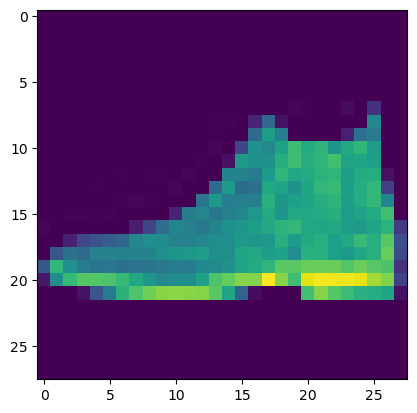

In [17]:
plt.imshow(x_test[0].reshape((28,28)))